In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df= pd.read_csv('parkinsons_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,...,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,...,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,...,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,...,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,...,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


In [16]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation', 'Diagnosis',
       'DoctorInCharge'],
      dtype='object')

In [17]:
df = df[[
     'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
    'UPDRS', 'MoCA', 'FunctionalAssessment', 'SpeechProblems',
    'SleepDisorders', 'Constipation', 'Age', 'FamilyHistoryParkinsons',
    'Diagnosis'
]]
df.head()

,Tremor,Rigidity,Bradykinesia,PosturalInstability,UPDRS,MoCA,FunctionalAssessment,SpeechProblems,SleepDisorders,Constipation,Age,FamilyHistoryParkinsons,Diagnosis
0,1,0,0,0,6.458713,29.181289,1.572427,0,0,0,85,0,0
1,0,1,0,1,37.306703,12.332639,4.787551,0,1,0,75,0,1
2,1,0,0,0,67.838170,29.927783,2.130686,1,0,1,70,0,1
3,1,1,1,0,52.964696,21.304268,3.391288,0,0,1,52,0,1
4,0,0,0,1,21.804880,8.336364,3.200969,0,1,0,87,0,0


In [20]:
df.shape

(2105, 13)

In [18]:
x= df.drop(['Diagnosis'], axis=1)
y= df['Diagnosis']

In [22]:
df['Diagnosis'].value_counts()

Diagnosis
1    1304
0     801
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
y_train.value_counts()

Diagnosis
1    1033
0     651
Name: count, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [27]:
y_train_smote.value_counts()


Diagnosis
0    1033
1    1033
Name: count, dtype: int64

<Axes: xlabel='Diagnosis', ylabel='Age'>

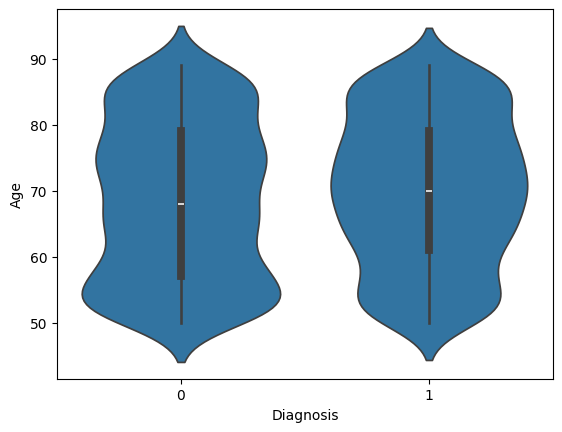

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x=y_train_smote, y=x_train_smote['Age'])




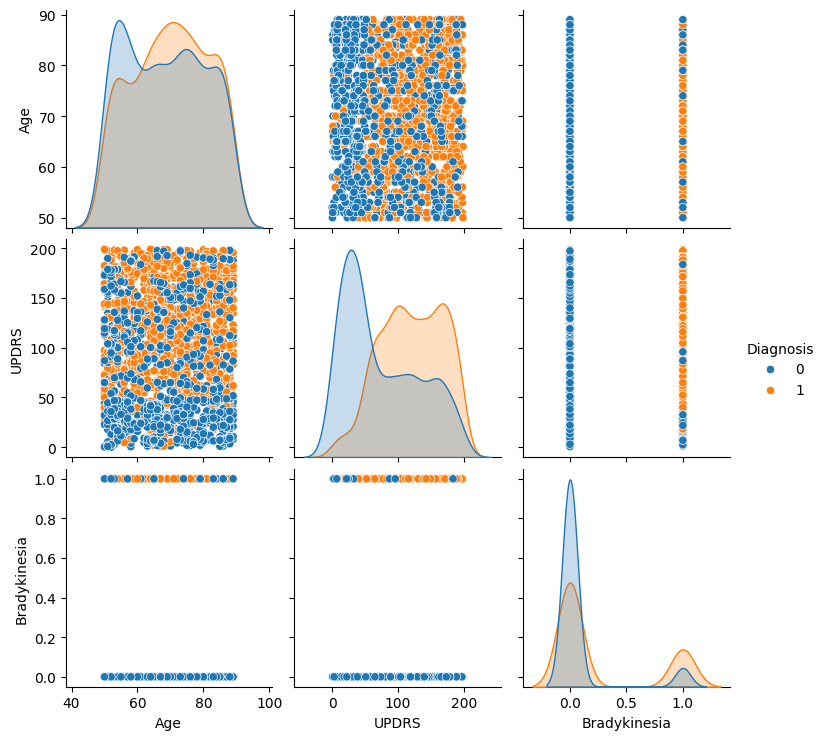

In [36]:
sns.pairplot(pd.concat([x_train_smote, y_train_smote.rename('Diagnosis')], axis=1), 
             hue='Diagnosis', vars=['Age','UPDRS','Bradykinesia'])


<Axes: >

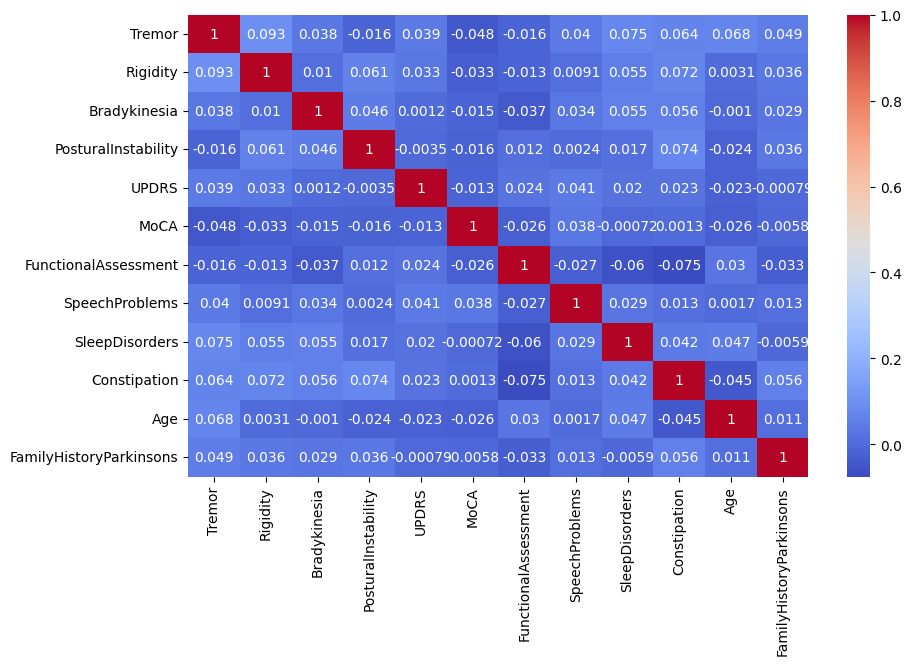

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train_smote.corr(), annot=True, cmap='coolwarm')

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature=['UPDRS', 'MoCA', 'FunctionalAssessment', 'Age']
x_train_smote[feature] = scaler.fit_transform(x_train_smote[feature])
x_test[feature] = scaler.transform(x_test[feature])

In [40]:
x_train_smote.head()

,Tremor,Rigidity,Bradykinesia,PosturalInstability,UPDRS,MoCA,FunctionalAssessment,SpeechProblems,SleepDisorders,Constipation,Age,FamilyHistoryParkinsons
0,1,0,0,0,-0.638528,1.278775,0.454800,0,0,0,0.148544,0
1,0,1,0,0,-1.078765,0.508732,-0.959129,1,0,0,-0.881008,0
2,1,1,0,0,0.079275,-0.901972,0.232078,0,0,0,-1.309988,0
3,1,0,0,0,0.141893,-0.116583,-0.941141,1,0,0,0.148544,1
4,0,0,0,0,1.495338,-1.460906,0.535688,1,1,0,0.062748,0


In [41]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB()
}



Random Forest Accuracy: 0.9050
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.95      0.90      0.92       271

    accuracy                           0.90       421
   macro avg       0.89      0.91      0.90       421
weighted avg       0.91      0.90      0.91       421

Confusion Matrix:
 [[136  14]
 [ 26 245]]


C:\Users\a4ana\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:13:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.9074
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.95      0.91      0.93       271

    accuracy                           0.91       421
   macro avg       0.90      0.91      0.90       421
weighted avg       0.91      0.91      0.91       421

Confusion Matrix:
 [[136  14]
 [ 25 246]]

Logistic Regression Accuracy: 0.7791
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70       150
           1       0.84      0.80      0.82       271

    accuracy                           0.78       421
   macro avg       0.76      0.77      0.76       421
weighted avg       0.78      0.78      0.78       421

Confusion Matrix:
 [[110  40]
 [ 53 218]]

SVM Accuracy: 0.8622
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82      

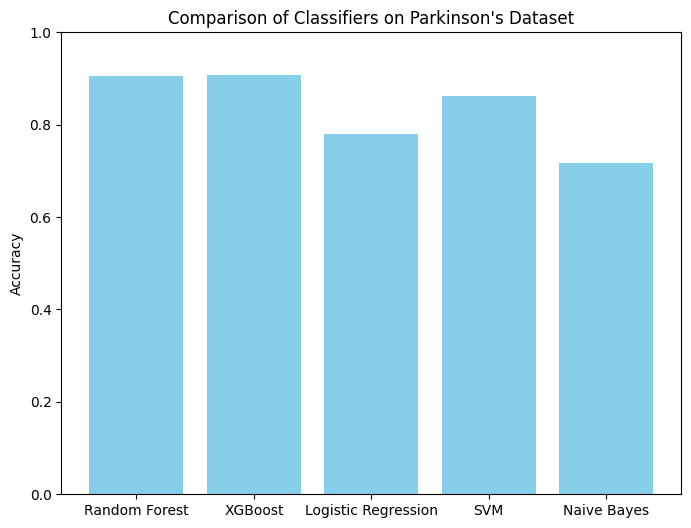

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
results = {}

for name, clf in models.items():
    clf.fit(x_train_smote, y_train_smote)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    results[name] = acc

# -----------------------
# 6. Compare classifiers
# -----------------------
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Comparison of Classifiers on Parkinson's Dataset")
plt.ylim(0,1)
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=50,             
    scoring='f1',           
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(x_train_smote, y_train_smote)


print("Best Hyperparameters:", random_search.best_params_)


y_pred = random_search.best_estimator_.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.6}
Accuracy: 0.9192399049881235
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       150
           1       0.95      0.92      0.94       271

    accuracy                           0.92       421
   macro avg       0.91      0.92      0.91       421
weighted avg       0.92      0.92      0.92       421



C:\Users\a4ana\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:16:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [51]:
import joblib
best_model = random_search.best_estimator_
joblib.dump(best_model, 'best_parkinson_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [55]:
import numpy as np

# Load saved model and scaler
model = joblib.load('best_parkinson_model.pkl')
scaler = joblib.load('scaler.pkl')


features = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
            'UPDRS', 'MoCA', 'FunctionalAssessment', 'SpeechProblems',
            'SleepDisorders', 'Constipation', 'Age', 'FamilyHistoryParkinsons']

continuous_features = ['UPDRS', 'MoCA', 'FunctionalAssessment', 'Age']

user_input = {}

print("Please enter the following values:")

for feature in features:
    
    val = input(f"{feature}: ")
    
    
    if feature in continuous_features:
        user_input[feature] = float(val)
    else:
        user_input[feature] = int(val)


input_df = pd.DataFrame([user_input])

input_df[continuous_features] = scaler.transform(input_df[continuous_features])

# Predict
prediction = model.predict(input_df)
prediction_proba = model.predict_proba(input_df)

# Output result
if prediction[0] == 1:
    print("\nPrediction: Parkinson's Disease")
else:
    print("\nPrediction: Healthy")

print("Prediction Probabilities:", prediction_proba)



Please enter the following values:

Prediction: Parkinson's Disease
Prediction Probabilities: [[0.06818599 0.931814  ]]
